<a href="https://colab.research.google.com/github/eromanrangel/Miscellaneous/blob/main/ITAM_DataScience_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import mnist

# Part 0: Load Iris dataset

In [2]:
# Load dataset iris
iris = load_iris()
X = iris.data
Y = iris.target

print("Data shape:", X.shape)
print("Data samples:\n", X[:10])

print("\nLabels shape", Y.shape)
print("Labels samples:\n", Y)

print("Class names:", iris.target_names)

Data shape: (150, 4)
Data samples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Labels shape (150,)
Labels samples:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Class names: ['setosa' 'versicolor' 'virginica']


In [3]:
# Print feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

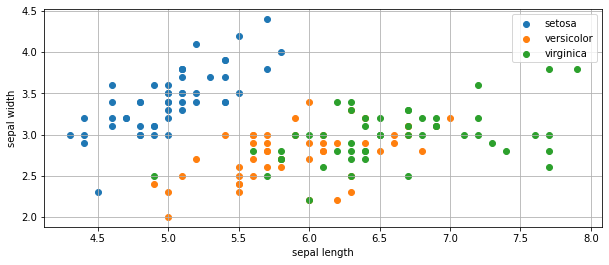

In [4]:
# Plot two features: petal length and petal width
plt.figure(figsize=(10, 4))
plt.scatter(X[Y==0, 0], X[Y==0, 1], label=iris.target_names[0])
plt.scatter(X[Y==1, 0], X[Y==1, 1], label=iris.target_names[1])
plt.scatter(X[Y==2, 0], X[Y==2, 1], label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

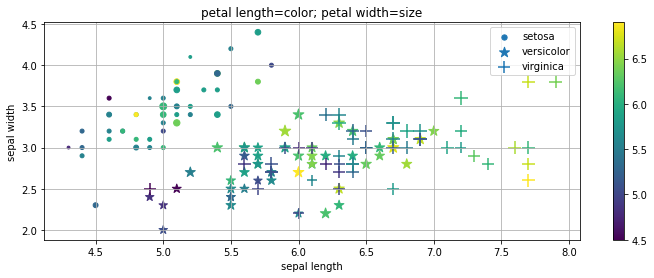

In [6]:
# == Q1: ==
# Idea alguna manera de visualizar y diferenciar las 4 variables al mismo tiempo,
# usando una sola gráfica 2D. Muestra tu solución:
plt.figure(figsize=(12, 4))
plt.scatter(X[Y==0, 0], X[Y==0, 1], c=X[Y==0, 2], s=80*X[Y==0, 3], marker='o', label=iris.target_names[0])
plt.scatter(X[Y==1, 0], X[Y==1, 1], c=X[Y==1, 2], s=80*X[Y==1, 3], marker='*', label=iris.target_names[1])
plt.scatter(X[Y==2, 0], X[Y==2, 1], c=X[Y==2, 2], s=80*X[Y==2, 3], marker='+', label=iris.target_names[2])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.colorbar()
plt.title('petal length=color; petal width=size')
plt.grid(True)
plt.show()

# Part 1: t-SNE for Iris dataset

In [7]:
# Create TSNE model
model_tsne = TSNE(n_components=2)

In [8]:
# Project onto 2D
x_tsne = model_tsne.fit_transform(X)
x_tsne.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(150, 2)

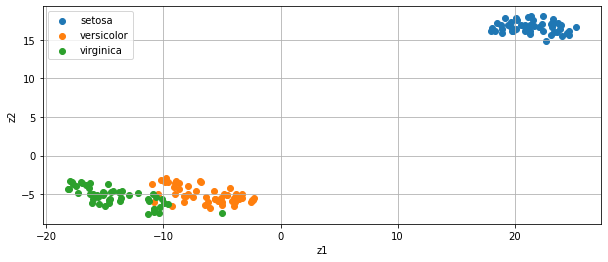

In [9]:
# Plot data in tSNE space
plt.figure(figsize=(10, 4))
plt.scatter(x_tsne[Y==0, 0], x_tsne[Y==0, 1], label=iris.target_names[0])
plt.scatter(x_tsne[Y==1, 0], x_tsne[Y==1, 1], label=iris.target_names[1])
plt.scatter(x_tsne[Y==2, 0], x_tsne[Y==2, 1], label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.xlabel('z1')
plt.ylabel('z2')
plt.show()

# Part 2: Load mnist dataset

In [10]:
# Load data set
(_, _), (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


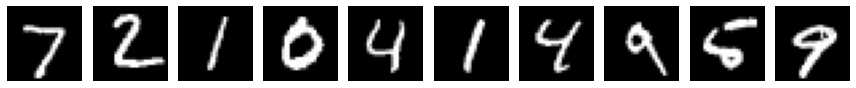

In [11]:
# Show a few examples of X
plt.figure(figsize=(12, 3))
for ind, img in enumerate(x_test[:10]):
  plt.subplot(1, 10, ind+1)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
# Reshape data into vector form
x_test = x_test.reshape(-1, 28*28)
print(x_test.shape)

(10000, 784)


# Part 3: t-SNE for mnist dataset

In [13]:
# Create TSNE model
model_tsne = TSNE(n_components=2)

In [14]:
# Project onto 2D
x_tsne = model_tsne.fit_transform(x_test)
x_tsne.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(10000, 2)

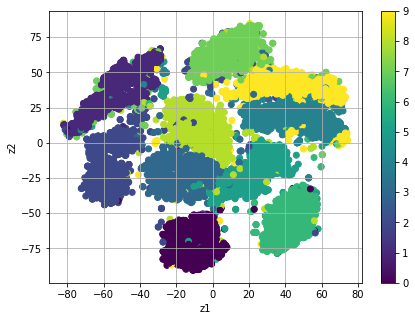

In [16]:
# Plot data in tSNE space
plt.figure(figsize=(7, 5))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_test)
plt.colorbar()
plt.grid(True)
plt.xlabel('z1')
plt.ylabel('z2')
plt.show()

In [17]:
# == Q2: ==
# Explora el impacto que tiene variar el parámetro "perplexity" en t-SNE
# prueba los valores: 2, 10, 30, 50, 100
# ¿Notas alguna tendencia o patrón?